In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("pima-indians-diabetes.csv")

In [ ]:
train_df, test_df = train_test_split(df, test_size_proportion=0.2)
tree = decision_tree_algorithm(train_df)
accuracy = calculate_accuracy(test_df, tree)

# Import Statements

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  
# make sure that the plot we create are displayed in this notebook

import random 
# use for train test split function
from pprint import pprint 
# the tree is displayed easy to read and understand


# Load and prepare data

In [2]:
df = pd.read_csv("pima-indians-diabetes1.csv")

#last column of the dataset must contain the label and should be called label
#there should be no missing values in dataset


df = df.rename(columns={'Decision': 'label'})

In [3]:
df.head()

,times_pregnant,glucose_tol,diastolic_pb,triceps,insulin,mass_index,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Train-Test-Split

In [4]:
def train_test_split(df, test_size):
    if isinstance(test_size, float):
        test_size = round(test_size * len(df))

    indices = df.index.tolist()
    test_indices = random.sample(population=indices, k=test_size)

    test_df = df.loc[test_indices]
    train_df = df.drop(test_indices)

    return train_df, test_df

In [5]:
train_df, test_df = train_test_split(df, test_size=0.2)

# Helper Functions

In [6]:
data = train_df.values
data[:5]

array([[8.000e+00, 1.830e+02, 6.400e+01, 0.000e+00, 0.000e+00, 2.330e+01,
        6.720e-01, 3.200e+01, 1.000e+00],
       [1.000e+00, 8.900e+01, 6.600e+01, 2.300e+01, 9.400e+01, 2.810e+01,
        1.670e-01, 2.100e+01, 0.000e+00],
       [0.000e+00, 1.370e+02, 4.000e+01, 3.500e+01, 1.680e+02, 4.310e+01,
        2.288e+00, 3.300e+01, 1.000e+00],
       [3.000e+00, 7.800e+01, 5.000e+01, 3.200e+01, 8.800e+01, 3.100e+01,
        2.480e-01, 2.600e+01, 1.000e+00],
       [1.000e+01, 1.150e+02, 0.000e+00, 0.000e+00, 0.000e+00, 3.530e+01,
        1.340e-01, 2.900e+01, 0.000e+00]])

# Data pure?

In [7]:
def check_purity(data):
    
    label_column = data[:, -1]
    unique_classes = np.unique(label_column)

    if len(unique_classes) == 1:
        return True
    else:
        return False

In [8]:
check_purity(train_df.values)

False

# Classify

In [9]:
def classify_data(data):
    
    label_column = data[:, -1]
    unique_classes, counts_unique_classes = np.unique(label_column, return_counts=True)
    index = counts_unique_classes.argmax()
    classification = unique_classes[index]
    
    return classification

In [10]:
classify_data(train_df[train_df.glucose_tol > 110].values)

1.0

# Potential Splits?

In [11]:
def get_potential_splits(data):
    potential_splits = {}
    _, n_columns = data.shape
    for column_index in range(n_columns-1):
        potential_splits[column_index] = []
        values = data[:, column_index]
        unique_values = np.unique(values)

        for index in range(len(unique_values)):
            if index != 0:
                current_value = unique_values[index]
                previous_value = unique_values[index-1]
                potential_split = current_value + previous_value / 2

                potential_splits[column_index].append(potential_split)
    
    return potential_splits

In [12]:
potential_splits = get_potential_splits(train_df.values)

/usr/local/lib/python3.7/site-packages/seaborn/regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


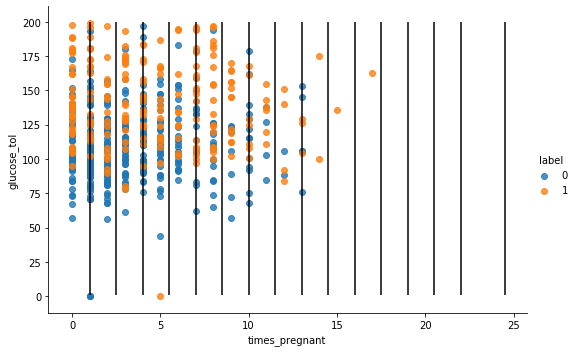

In [13]:
sns.lmplot(data=train_df, x="times_pregnant", y="glucose_tol", hue="label", fit_reg=False, size=5, aspect=1.5)

plt.vlines(x=potential_splits[0], ymin=1, ymax=200)
# plt.hlines(y=potential_splits[1], xmin=0, xmax=18)

# Split Data

In [29]:
def split_data(data, split_column, split_value):
    
    split_column_values = data[:, split_column]

    data_below = data[split_column_values <= split_value]
    data_above = data[split_column_values > split_value]
    
    return data_below, data_above

In [30]:
split_column = 0
split_value = 13.5

In [32]:
data_below, data_above = split_data(data, split_column, split_value)

(-1, 15)

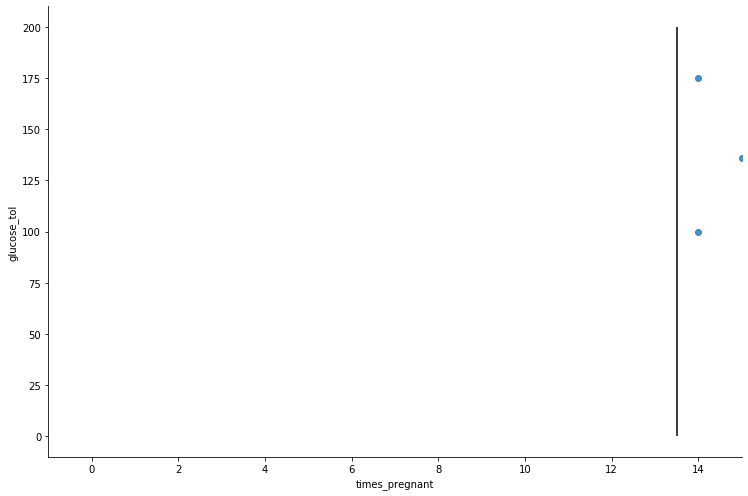

In [33]:
# check if it is working properly data_above or data_below only

plotting_df = pd.DataFrame(data_above, columns=df.columns)

sns.lmplot(data=plotting_df, x='times_pregnant', y='glucose_tol', fit_reg=False, size=7, aspect=1.5)

plt.vlines(x=split_value, ymin=0, ymax=200)
plt.xlim(-1,15)

# Lowest overall Entropy

In [34]:
def calculate_entropy(data):
    
    label_column = data[:, -1]
    _, counts = np.unique(label_column, return_counts=True)
#     print(counts)

    #get probabilities of classes, 
    probabilities = counts / counts.sum()

    #calc entropy
    entropy = sum(probabilities * (-np.log2(probabilities)))
    
    return entropy

In [37]:
calculate_entropy(data_above) # for the data above we should get 0 to be sure that the function is working because in the plot above we saw only 2 points belonging to the same class

0.0

In [38]:
calculate_entropy(data_below)

0.9362450133154983

In [39]:
def calculate_overall_entropy(data_below, data_above):

    n_data_points = len(data_below) + len(data_above)

    p_data_below = len(data_below) / n_data_points
    p_data_above = len(data_above) / n_data_points

    overall_entropy = (p_data_below * calculate_entropy(data_below) + p_data_above * calculate_entropy(data_above))

    return overall_entropy

In [40]:
calculate_overall_entropy(data_below, data_above)

0.9301456972678402

In [66]:
def determine_best_split(data, potential_splits):
    overall_entropy = 999;

    for column_index in potential_splits:
        for value in potential_splits[column_index]:
            data_below, data_above = split_data(data, split_column=column_index, split_value=value)
            current_overall_entropy = calculate_overall_entropy(data_below, data_above)

            if current_overall_entropy <= overall_entropy:
                overall_entropy = current_overall_entropy
                best_split_column = column_index
                best_split_value = value
    
    return best_split_column, best_split_value

In [67]:
get_potential_splits(data)

{0: [1.0,
  2.5,
  4.0,
  5.5,
  7.0,
  8.5,
  10.0,
  11.5,
  13.0,
  14.5,
  16.0,
  17.5,
  19.0,
  20.5,
  22.0,
  24.5],
 1: [44.0,
  78.0,
  85.0,
  89.5,
  92.5,
  96.0,
  99.5,
  101.5,
  105.0,
  107.5,
  109.0,
  110.5,
  112.0,
  113.5,
  115.0,
  116.5,
  118.0,
  119.5,
  121.0,
  122.5,
  124.0,
  125.5,
  127.0,
  128.5,
  130.0,
  131.5,
  133.0,
  134.5,
  136.0,
  137.5,
  139.0,
  140.5,
  142.0,
  143.5,
  145.0,
  146.5,
  148.0,
  149.5,
  151.0,
  152.5,
  154.0,
  155.5,
  157.0,
  158.5,
  160.0,
  161.5,
  163.0,
  164.5,
  166.0,
  167.5,
  169.0,
  170.5,
  172.0,
  173.5,
  175.0,
  176.5,
  178.0,
  179.5,
  181.0,
  182.5,
  184.0,
  185.5,
  187.0,
  188.5,
  190.0,
  191.5,
  193.0,
  194.5,
  196.0,
  197.5,
  199.0,
  200.5,
  202.0,
  203.5,
  205.0,
  206.5,
  208.0,
  209.5,
  211.0,
  212.5,
  214.0,
  215.5,
  217.0,
  218.5,
  220.0,
  221.5,
  223.0,
  224.5,
  226.0,
  227.5,
  229.0,
  230.5,
  232.0,
  233.5,
  235.0,
  236.5,
  238.0,
  240

In [68]:
potential_splits = get_potential_splits(data)

In [69]:
determine_best_split(data, potential_splits)

(1, 122.5)

# Decision Tree

In [97]:
def decision_tree_algorithm(df, counter=0, min_samples = 2):
    
    # data preparation
    if counter == 0:
        global COLUMN_HEADERS # global because this is executed only when counter 0 and we don't have acces to it inside the else
        COLUMN_HEADERS = df.columns
        data = df.values
    else:
        data = df
        
    
    # base case
    if check_purity(data) or (len(data) < min_samples):
        classification = classify_data(data)
        return classification
    
    # recursive part
    else:
        counter += 1
        
        # helper functions
        potential_splits = get_potential_splits(data)
        split_column, split_value = determine_best_split(data, potential_splits)
        data_below, data_below = split_data(data, split_column, split_value)
        
        # instatiate sub-tree
        feature_name = COLUMN_HEADERS[split_column]
        question = "{} <= {}".format(feature_name, split_value)
        sub_tree = {question: []}
        
        # find answers (recursion)
        yes_answer = decision_tree_algorithm(data_below, counter, min_samples)
        no_answer = decision_tree_algorithm(data_above, counter, min_samples)
        
        sub_tree[question].append(yes_answer)
        sub_tree[question].append(no_answer)
        
        return sub_tree

In [101]:
tree = decision_tree_algorithm(train_df, min_samples=100)
pprint(tree)

{'glucose_tol <= 122.5': [{'mass_index <= 30.8': [{'pedigree <= 0.438': [1.0,
                                                                         1.0]},
                                                  1.0]},
                          1.0]}
